In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

add Path of image-directory

In [2]:
pathImages = 'C:/Users/shadmehr/Downloads/Compressed/Subtracted images of CDD-CESM'

add path of manual excel file directory

In [3]:
pathManual = 'C:/Users/shadmehr/Downloads/Compressed/Radiology manual annotations.xlsx'
manualRadio = pd.read_excel(pathManual)

rename lable of manual file

In [4]:
manualRadio= manualRadio.rename(columns={'Pathology Classification/ Follow up':'classification'})

discard Type DM

In [5]:
manualRadio = manualRadio[manualRadio['Type']=='CESM']

In [6]:
manualRadio.head()

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,classification
1,P1_L_CM_MLO,1,L,CESM,46,_,4,Heterogenous non mass enhancement,MLO,"suspicious, non mass",1,Malignant
4,P2_R_CM_CC,2,R,CESM,31,_,3,Multiple homogenously enhancing masses,CC,"benign, masses, homogenous",2,Benign
5,P2_R_CM_MLO,2,R,CESM,31,_,3,Multiple homogenously enhancing masses,MLO,"benign, masses, homogenous",2,Benign
8,P2_L_CM_CC,2,L,CESM,31,_,2,Flap with no enhancement,CC,"flap, benign",2,Benign
9,P2_L_CM_MLO,2,L,CESM,31,_,2,Flap with no enhancement,MLO,"flap, benign",2,Benign


load Images

In [7]:
import os
images = os.listdir(pathImages)
loaded_images = []
#filename_txt = []
for filename in images:
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_list = plt.imread(os.path.join(pathImages, filename))
        loaded_images.append(image_list)
        #filename_txt.append(filename)

In [8]:
manualRadio = manualRadio.sort_values(by=['Image_name'])

In [9]:
manualRadio.head()

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,classification
556,P100_L_CM_CC,100,L,CESM,61,_,2,Non enhancement,CC,postoperative,1,Benign
557,P100_L_CM_MLO,100,L,CESM,61,_,2,Non enhancement,MLO,postoperative,1,Benign
552,P100_R_CM_CC,100,R,CESM,61,_,1,No mass or non mass enhancement,CC,normal,1,Normal
553,P100_R_CM_MLO,100,R,CESM,61,_,1,No mass or non mass enhancement,MLO,normal,1,Normal
564,P101_L_CM_CC,101,L,CESM,47,_,1,No mass or non mass enhancement,CC,normal,1,Normal


to access to manual file with name of image

In [10]:
#image_name =[]
#for i in range(len(filename_txt)):
    #image_name.append(filename_txt[i].replace('.jpg',''))

initialize size of validation_data and test_data

In [11]:
validation_data_size = int(len(loaded_images)*0.12)
test_data_size = int(len(loaded_images)*0.13)

In [12]:
random_select = np.random.choice(len(loaded_images), size=validation_data_size, replace=False)

set Validation data

In [13]:
validation_data_x = np.array(loaded_images)[random_select]
validation_data_y = manualRadio.iloc[random_select]
loaded_images = np.delete(loaded_images, random_select, axis=0)
manualRadio=manualRadio.drop(manualRadio.index[random_select])

C:\Users\shadmehr\AppData\Local\Temp\ipykernel_3684\3989429975.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  validation_data_x = np.array(loaded_images)[random_select]
C:\Users\shadmehr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [14]:
validation_data_y.count()

Image_name              120
Patient_ID              120
Side                    120
Type                    120
Age                     120
Breast density (ACR)    120
BIRADS                  120
Findings                120
View                    120
Tags                    120
Machine                 120
classification          120
dtype: int64

In [15]:
random_select = np.random.choice(len(loaded_images), size=test_data_size, replace=False)

set test_data

In [16]:
test_data_x = np.array(loaded_images)[random_select]
test_data_y = manualRadio.iloc[random_select]
loaded_images = np.delete(loaded_images, random_select, axis=0)
manualRadio=manualRadio.drop(manualRadio.index[random_select])

In [17]:
test_data_y.count()

Image_name              130
Patient_ID              130
Side                    130
Type                    130
Age                     130
Breast density (ACR)    130
BIRADS                  130
Findings                130
View                    130
Tags                    130
Machine                 130
classification          130
dtype: int64

set train_data

In [18]:
train_data_x = np.array(loaded_images)
train_data_y = manualRadio[["Image_name" , "classification"]]

In [19]:
len(train_data_x)

753

In [20]:
train_data_y.count()

Image_name        753
classification    753
dtype: int64

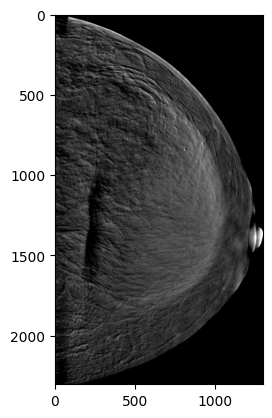

In [21]:
img = train_data_x[0]
plt.imshow(img)

In [22]:
train_data_y.head()

,Image_name,classification
556,P100_L_CM_CC,Benign
557,P100_L_CM_MLO,Benign
552,P100_R_CM_CC,Normal
553,P100_R_CM_MLO,Normal
564,P101_L_CM_CC,Normal


Resize all images

In [23]:
import cv2

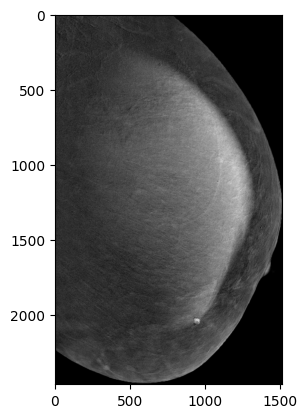

In [24]:
img1 = train_data_x[752]
plt.imshow(img1)

In [25]:
new_train_x = []


In [26]:
new_train_x = np.array([cv2.resize(i, (224, 224)) for i in train_data_x])

In [27]:
len(new_train_x)

753

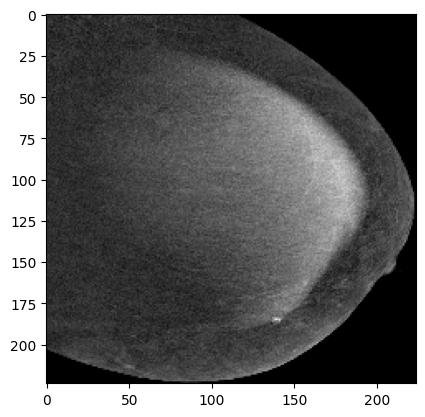

In [28]:
img = train_data_x[752]
img2 = cv2.resize(img,(224,224))
plt.imshow(img2)

In [29]:
train_data_x = new_train_x

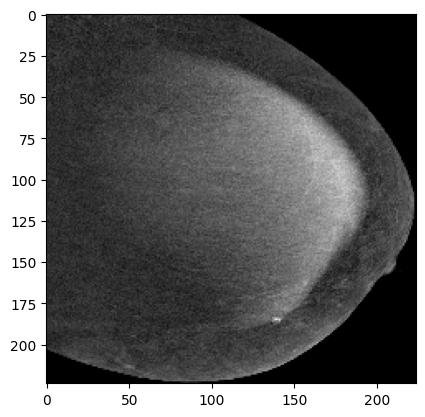

In [30]:
img = train_data_x[752]
plt.imshow(img)

In [31]:
new_test_x = []
new_validation_x = []

In [32]:
new_test_x = np.array([cv2.resize(i, (224, 224)) for i in test_data_x])
new_validation_x  = np.array([cv2.resize(i, (224, 224)) for i in validation_data_x])

In [ ]:
test_data_x = new_test_x 
validation_data_x = new_validation_x 

In [ ]:
del new_train_x
del new_test_x 
del new_validation_x 